In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

data = pd.read_csv("wine.data", delimiter=',',index_col=False) 
data.columns =['Alcohol', 'Malic', 'Ash', 'Ash_A','Mag', 'T_phenols', 'Fla', 
                             'N_Fla' , 'Proan', 'Color','Hue','Diluted','Proline']


In [2]:
data

,Alcohol,Malic,Ash,Ash_A,Mag,T_phenols,Fla,N_Fla,Proan,Color,Hue,Diluted,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62


# 1.Analysis of the dataset:

## Check for missing values in the data

In [3]:
data.isnull().any()

Alcohol      False
Malic        False
Ash          False
Ash_A        False
Mag          False
T_phenols    False
Fla          False
N_Fla        False
Proan        False
Color        False
Hue          False
Diluted      False
Proline      False
dtype: bool

## Check outliers

In [4]:
data.describe()

,Alcohol,Malic,Ash,Ash_A,Mag,T_phenols,Fla,N_Fla,Proan,Color,Hue,Diluted,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000


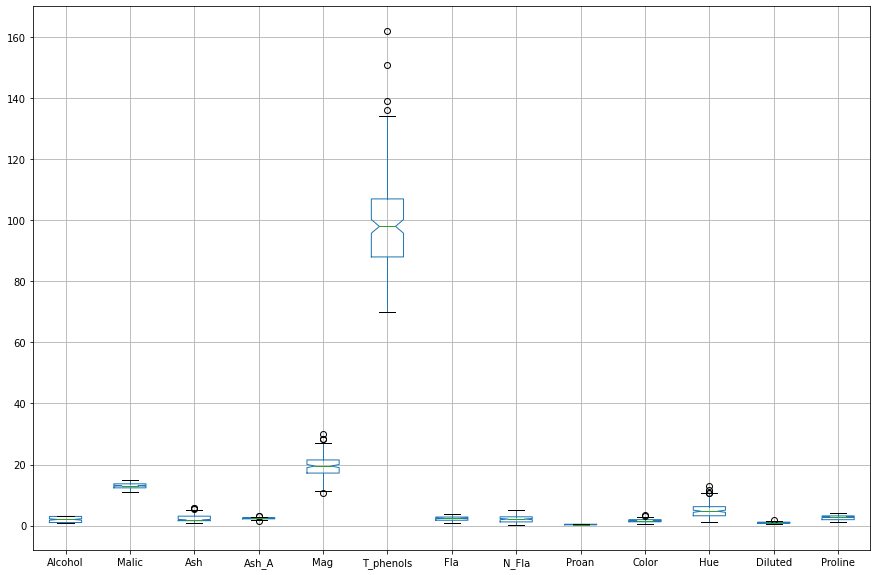

In [5]:
#We use box plots.
data.plot(kind='box', notch=True, grid=True,figsize = (15,10))

In [6]:
#We can see that there are several features that have outliers.

1
2
3


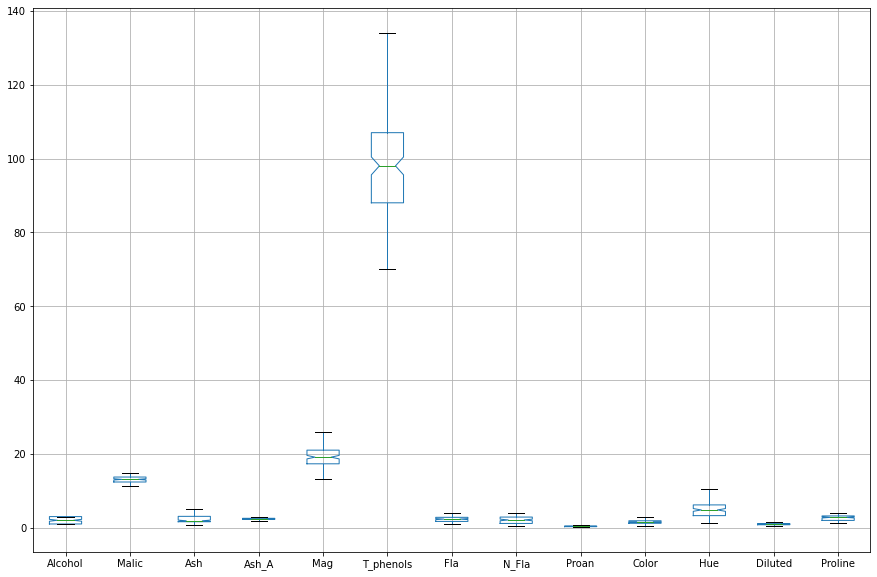

In [7]:
#Q1=25%
#Q3=75%
#IQR = Q3-Q1
#UpLimit：Q3+1.5IQR
#DownLimit：Q1-1.5IQR
t = 0
while t < 3 :
    for i in data.columns:
        Percentile = np.percentile(data[i],[0,25,50,75,100])
        IQR = Percentile[3] - Percentile[1]
        UpLimit = Percentile[3]+IQR*1.5
        DownLimit = Percentile[1]-IQR*1.5
        data = data[(data[i] < UpLimit) &(data[i] > DownLimit)]
    t+=1
    print(t)
data.plot(kind='box',figsize = (15,10), notch=True, grid=True)

#Here I cycled through the deletion process 3 times, as some outliers would not be clean if deleted only once

In [8]:
data

,Alcohol,Malic,Ash,Ash_A,Mag,T_phenols,Fla,N_Fla,Proan,Color,Hue,Diluted,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62


## Feature Visualisation

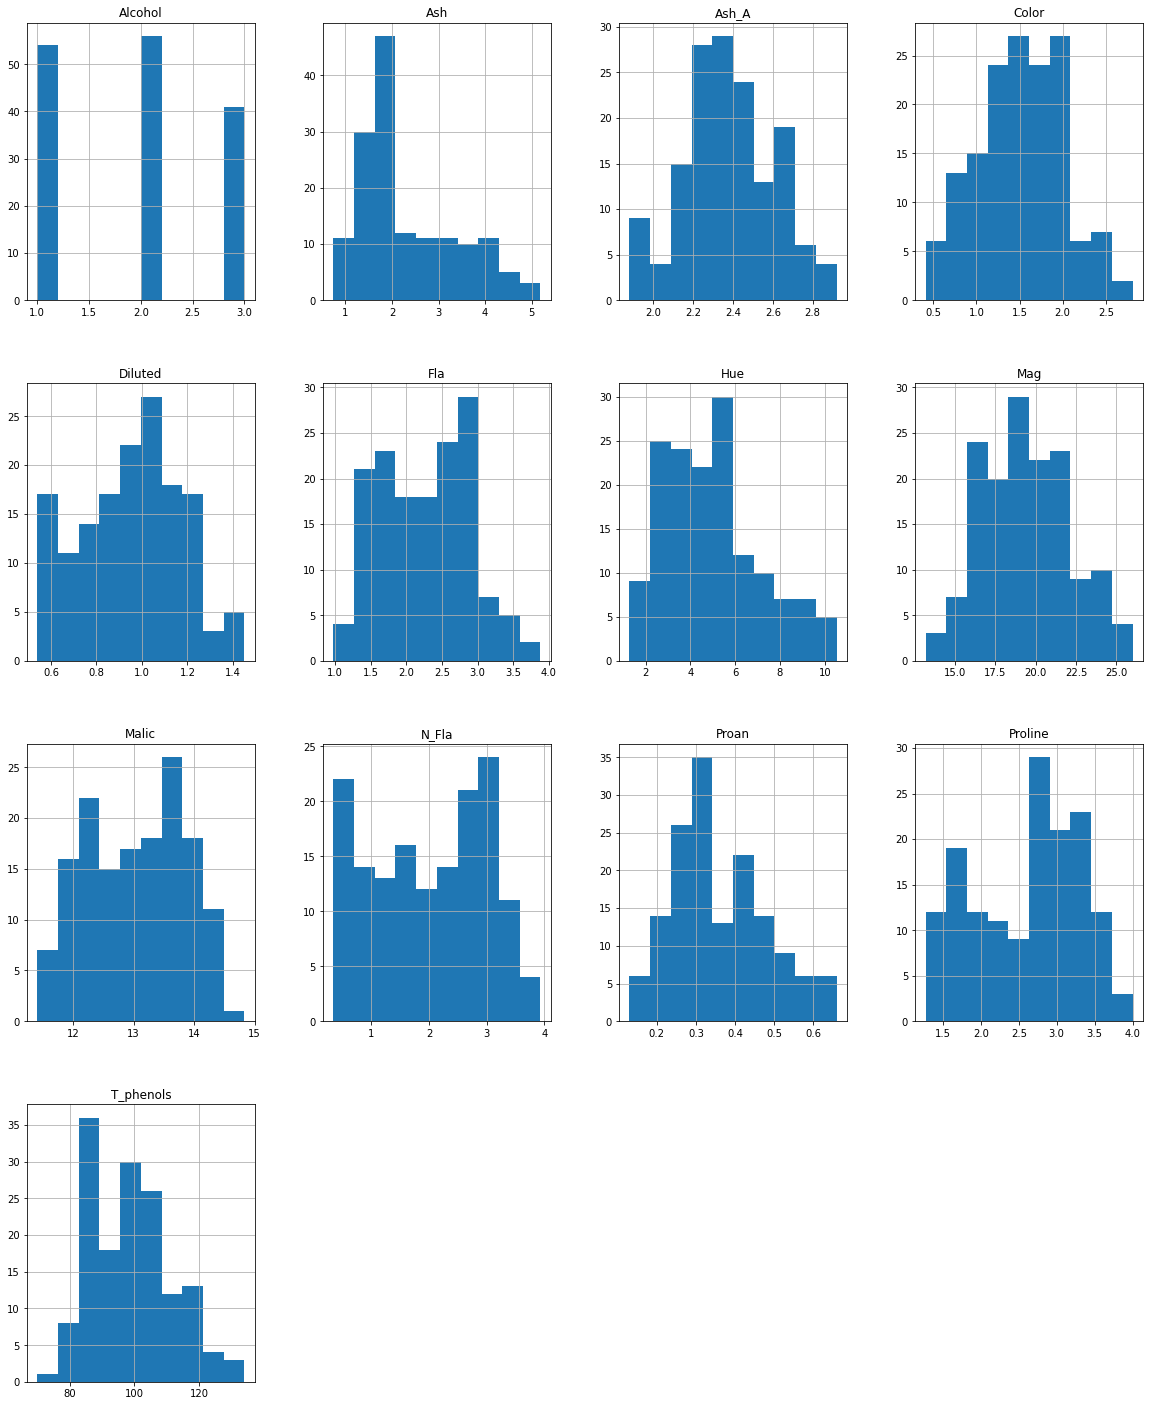

In [19]:
data.hist(figsize=(20, 25))
plt.show()

## Correlation between features

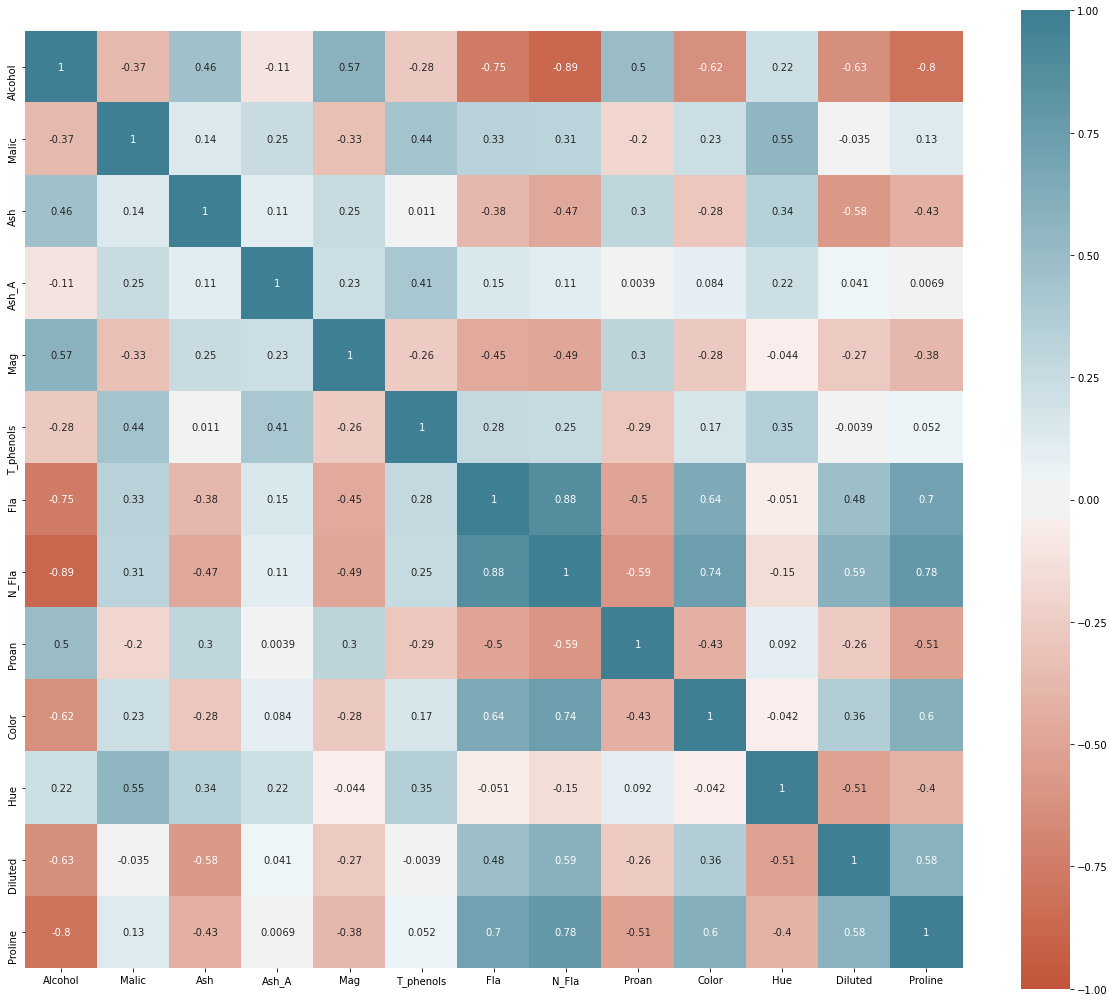

In [10]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(21, 18))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=220), square=True, annot=True)
plt.show()

# 2.Prediction:

In [11]:
#We use the first column feature "Alcohol" as the label class
target = data.iloc[:, [0]]

## Preprocessing

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
stdScaler=StandardScaler().fit(data)
DataScaler = stdScaler.transform(data)
X_train,X_test, y_train, y_test = train_test_split(DataScaler, target, test_size=0.4, random_state=24)

## Linear regression

In [13]:
from pandas import Series,DataFrame
model = LinearRegression().fit(X_train,y_train)
pred_y = model.predict(X_test)
pred_y = pd.DataFrame(pred_y) 
y_test.reset_index(drop=True, inplace=True)
y_all_1 = y_test.join(pred_y, lsuffix='_pred_y', rsuffix='_y_test')
print("test:",y_test['Alcohol'].sum())
print("predict",pred_y[0].sum())


'''
这里有个很大的问题

我想找出第一列和第二列相等的dataitem，count他们，然后用这个count/总和，得出准确率
但是我发现，使用线性回归得出的预测值pred_y，它是float64类型的，而且应该进行了四舍五入，ex：第一行是2.0，真实值是1.98888888。
我发现这个情况也是我想把pred_y的类型用astype转化成int类型，得到的值和转换之前的完全不一样。
到最后我也没想出一个好的解决方法，所以我最后还是使用（sum）方法了。
'''
y_all_1

test: 114
predict 114.0


,Alcohol,0
0,2,2.0
1,3,3.0
2,2,2.0
3,2,2.0
4,2,2.0
...,...,...
56,3,3.0
57,2,2.0
58,2,2.0
59,2,2.0


## KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# Choose best K
best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
 
print("best_k = ", best_k)
print("best_score = ", best_score)

best_k =  6
best_score =  0.9836065573770492


In [15]:

model =KNeighborsClassifier(n_neighbors=6)  
model.fit(X_train,y_train)
Pred_y =model.predict(X_test)

#Original and predicted values combined into one dataframe
Pred_y = pd.DataFrame(Pred_y)
y_test=y_test.reset_index(drop=True)
y_all_2 = Pred_y.join(y_test, lsuffix='_y_test', rsuffix='_Pred_y')


# Calculation accuracy
correct_amount = y_all_2[y_all_2[0] == y_all_2["Alcohol"]].shape[0]
print(correct_amount)
print("Accuracy is {0} % ".format(correct_amount / y_all_2.shape[0] * 100))


# Calculation of mean squared error
mean_squared_error(Pred_y, y_test)

60
Accuracy is 98.36065573770492 % 


0.01639344262295082

## xgb

In [16]:
#combine xgb method can be better
import xgboost as xgb
clf = xgb.XGBClassifier(seed=42).fit(X_train,y_train)
Pred_y = clf.predict(X_test)
Pred_y = pd.DataFrame(Pred_y)
y_all = Pred_y.join(y_test, lsuffix='_y_test', rsuffix='_Pred_y')


correct_amount = y_all[y_all[0] == y_all["Alcohol"]].shape[0]
print(correct_amount)
print("Accuracy is {0} % ".format(correct_amount / y_all.shape[0] * 100))

[23:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
61
Accuracy is 100.0 % 


# 3.Visualization:

## Linear regression visu

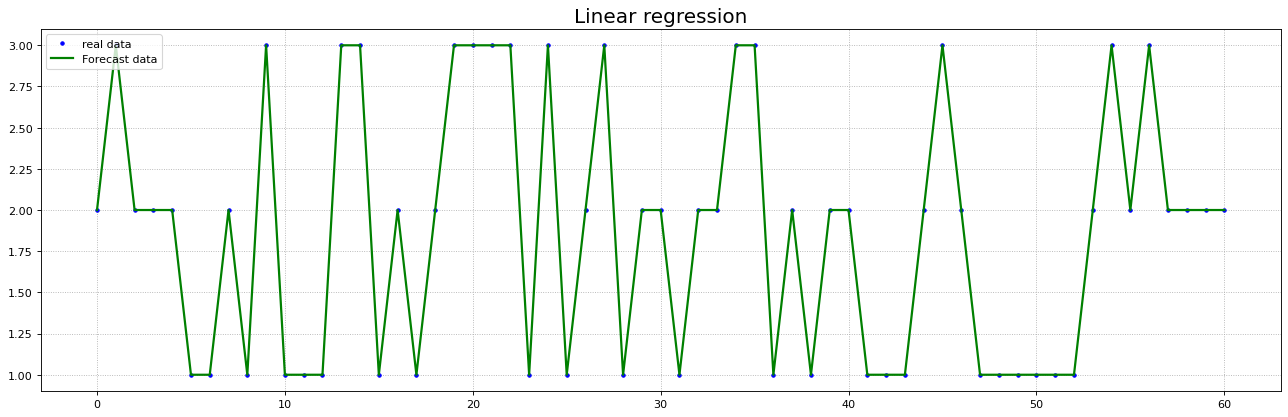

In [17]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(y_all_1.index,y_all_1['Alcohol'] , 'b.', linewidth=2, label='real data')
plt.plot(y_all_1.index,y_all_1[0], 'g-', linewidth=2, label='Forecast data')
plt.title('Linear regression', fontsize=18)
plt.legend(loc='upper left')

plt.grid(b=True, ls=':')
plt.show()

## knn visu

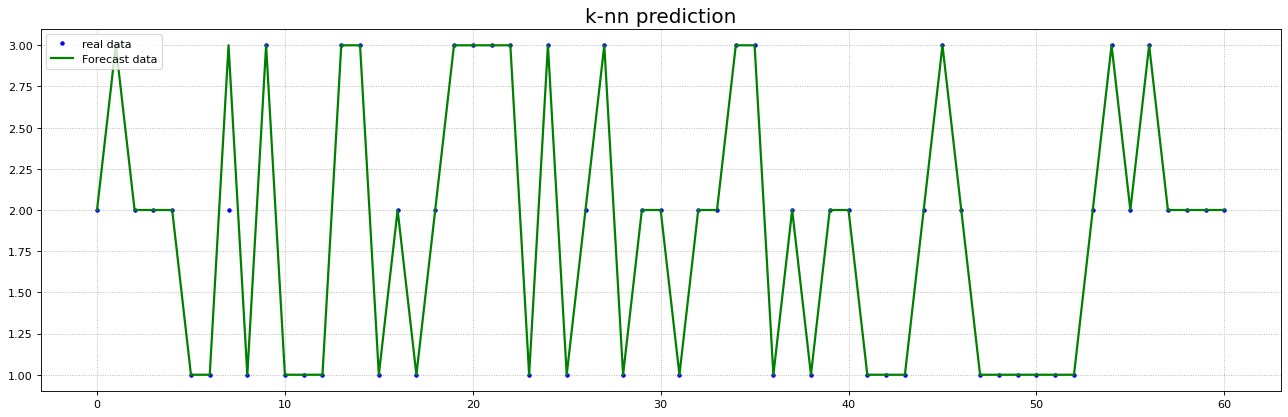

In [18]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')


plt.plot(y_all_2.index,y_all_2['Alcohol'] , 'b.', linewidth=2, label='real data')
plt.plot(y_all_2.index,y_all_2[0], 'g-', linewidth=2, label='Forecast data')
plt.title('k-nn prediction', fontsize=18)
plt.legend(loc='upper left')

plt.grid(b=True, ls=':')
plt.show()